In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NMP=100
L=20

occupancies = np.zeros((L,L),dtype=int)
particles = np.zeros((NMP,2),dtype=int)
if(NMP>L**2): raise Error("NMP>L^2")
for i in range(NMP):
    ix=np.random.randint(0,L)
    iy=np.random.randint(0,L)
    while(occupancies[ix,iy]==1):
        ix=np.random.randint(0,L)
        iy=np.random.randint(0,L)   
    occupancies[ix,iy]=1
    particles[i,:] = [ix,iy]
    
ixvic=np.zeros((L,L,6),dtype=int)
iyvic=np.zeros((L,L,6),dtype=int)

for i in range(L):
    for j in range(L):
        #EVEN ROWS
        if( j%2==0):
            #vicino 1
            if(i>0):
                ixvic[i,j,1]=i-1
                iyvic[i,j,1]=j
            else:
                ixvic[i,j,1]=L-1
                iyvic[i,j,1]=j
            #vicino 2
            if(i<L-1):
                ixvic[i,j,2]=i+1
                iyvic[i,j,2]=j
            else:
                ixvic[i,j,2]=0
                iyvic[i,j,2]=j
            #vicino 3
            if(i>0 and j<L-1):
                ixvic[i,j,3]=i-1
                iyvic[i,j,3]=j+1
            elif(i==0 and j<L-1):
                ixvic[i,j,3]=L-1
                iyvic[i,j,3]=j+1
            elif(i>0 and j==L-1):
                ixvic[i,j,3]=i-1
                iyvic[i,j,3]=0
            else:
                ixvic[i,j,3]=L-1
                iyvic[i,j,3]=0
            #vicino 4
            if(j<L-1):
                ixvic[i,j,4]=i
                iyvic[i,j,4]=j+1
            else:
                ixvic[i,j,4]=i
                iyvic[i,j,4]=0
            #vicino 5
            if(i>0 and j>0):
                ixvic[i,j,5]=i-1
                iyvic[i,j,5]=j-1
            elif(i==0 and j>0):
                ixvic[i,j,5]=L-1
                iyvic[i,j,5]=j-1
            elif(i>0 and j==0):
                ixvic[i,j,5]=i-1
                iyvic[i,j,5]=L-1
            else:
                ixvic[i,j,5]=L-1
                iyvic[i,j,5]=L-1
            #vicino 6
            if(j>0):
                ixvic[i,j,0]=i
                iyvic[i,j,0]=j-1
            else:
                ixvic[i,j,0]=i
                iyvic[i,j,0]=L-1
        #ODD ROWS
        else:
            #vicino 1
            if(i>0):
                ixvic[i,j,1]=i-1
                iyvic[i,j,1]=j
            else:
                ixvic[i,j,1]=L-1
                iyvic[i,j,1]=j
            #vicino 2
            if(i<L-1):
                ixvic[i,j,2]=i+1
                iyvic[i,j,2]=j
            else:
                ixvic[i,j,2]=0
                iyvic[i,j,2]=j
            #vicino 3
            if(j<L-1):
                ixvic[i,j,3]=i
                iyvic[i,j,3]=j+1
            else:
                ixvic[i,j,3]=i
                iyvic[i,j,3]=0
            #vicino 4
            if(i<L-1 and j<L-1):
                ixvic[i,j,4]=i+1
                iyvic[i,j,4]=j+1
            elif(i==L-1 and j<L-1):
                ixvic[i,j,4]=0
                iyvic[i,j,4]=j+1
            elif(i<L-1 and j==L-1):
                ixvic[i,j,4]=i+1
                iyvic[i,j,4]=0
            else:
                ixvic[i,j,4]=0
                iyvic[i,j,4]=0
            #vicino 5
            if(j>0):
                ixvic[i,j,5]=i
                iyvic[i,j,5]=j-1
            else:
                ixvic[i,j,5]=i
                iyvic[i,j,5]=L-1
            #vicino 6
            if(i<L-1 and j>0):
                ixvic[i,j,0]=i+1
                iyvic[i,j,0]=j-1
            elif(i==L-1 and j>0):
                ixvic[i,j,0]=0
                iyvic[i,j,0]=j-1
            elif(i<L-1 and j==0):
                ixvic[i,j,0]=i+1
                iyvic[i,j,0]=L-1
            else:
                ixvic[i,j,0]=0
                iyvic[i,j,0]=L-1               

En=0.0
for ipart in range(NMP):
    ix=particles[ipart,0]; iy=particles[ipart,1]
    for ik in range(6):
        if(occupancies[ixvic[ix,iy,ik],iyvic[ix,iy,ik]]==1): En+=1.0
En/=2.0
xlattice=np.zeros((L,L),dtype=np.float64)
ylattice=np.zeros((L,L),dtype=np.float64)
for i in range(L):
    for j in range(L):
        if(j%2==0):
            xlattice[i,j] = i 
            ylattice[i,j] = 0.5*j*np.sqrt(3.0)
        else:
            xlattice[i,j] = i+0.5
            ylattice[i,j] = 0.5*j*np.sqrt(3.0)
            
            

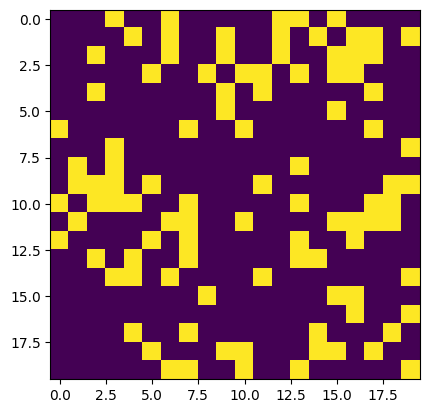

In [4]:
plt.imshow(occupancies)

0
0.9048374180359595
0.8187307530779818
0.8187307530779818
0.9048374180359595
0.9048374180359595
0.9048374180359595
0.8187307530779818
0.9048374180359595
1.0


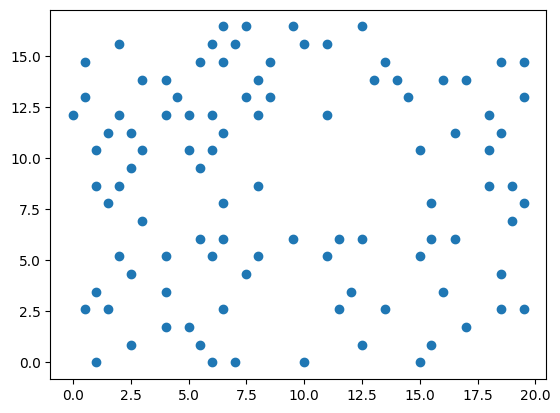

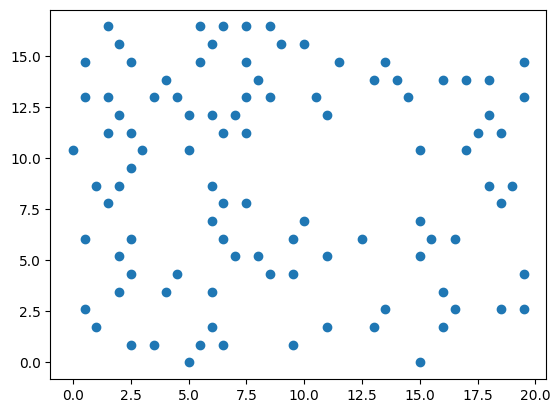

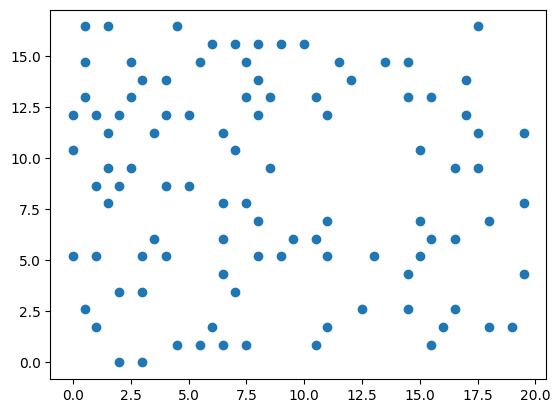

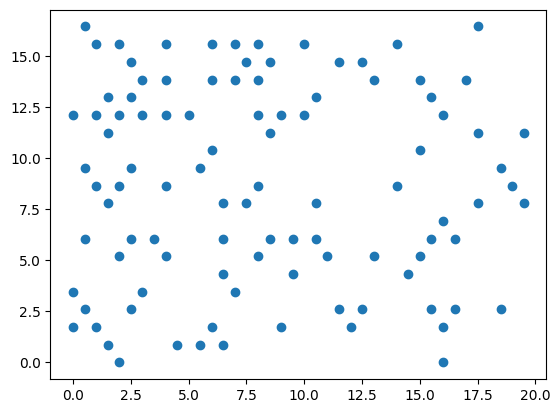

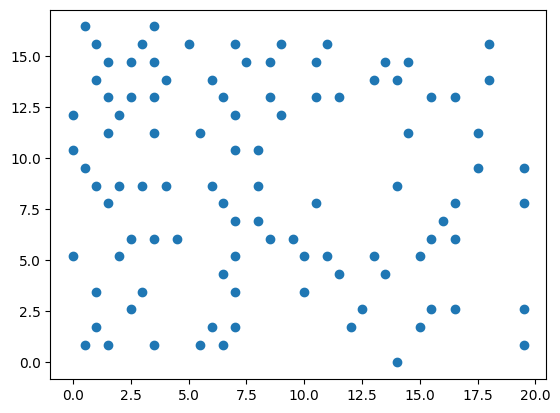

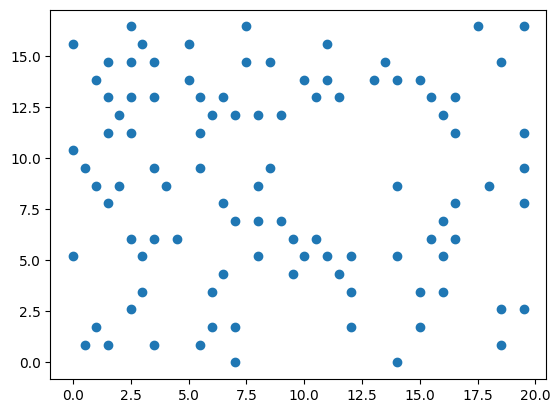

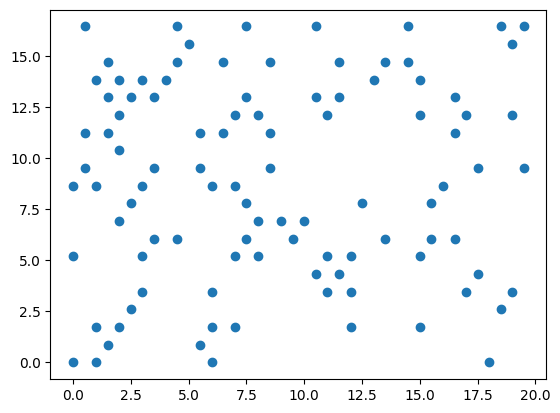

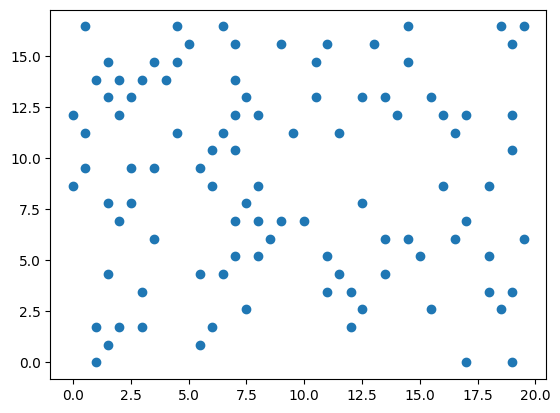

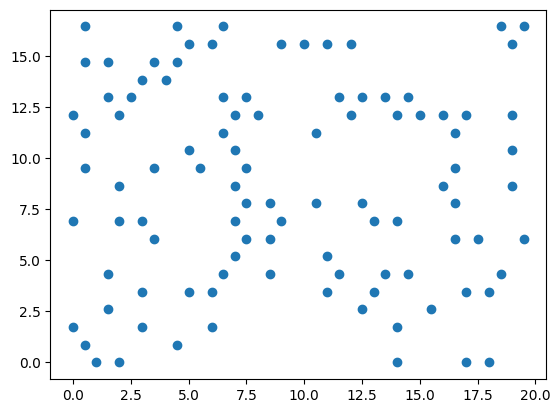

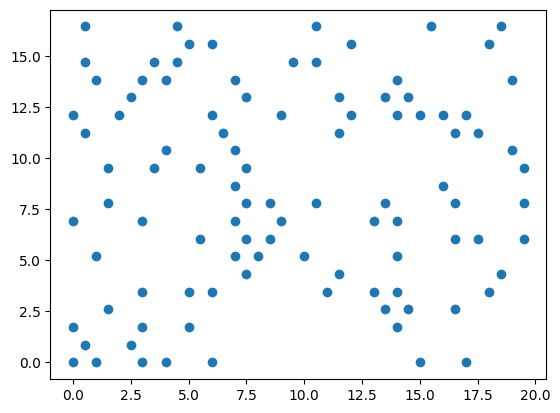

In [74]:


istep=0
Nsteps=1000
Temperatura=10
P=0
for istep in range(Nsteps):
    if(istep%100==0):
        plt.figure()
        print(P)
        plt.scatter(xlattice[occupancies==1],ylattice[occupancies==1])
        
    irand = np.random.randint(NMP)
    ivic  = np.random.randint(6)
    
    xy_vic = [ixvic[particles[irand,0],particles[irand,1],ivic],iyvic[particles[irand,0],particles[irand,1],ivic]]
    if(occupancies[xy_vic[0],xy_vic[1]]==1): continue
    e_old=0.0
    for j in range(6):
        xy_tmp = [ixvic[particles[irand,0],particles[irand,1],j],iyvic[particles[irand,0],particles[irand,1],j]]

        if(occupancies[xy_tmp[0],xy_tmp[1]]==1): e_old-=1.0
    e_new=0.0
    for j in range(6):
        xy_tmp = [ixvic[xy_vic[0],xy_vic[1],j],iyvic[xy_vic[0],xy_vic[1],j]]
        if(np.array(xy_tmp== particles[irand,:]).all ):continue #it would be empty
        if(occupancies[xy_tmp]==1): e_new-=1.0
    P = np.exp( -(e_new-e_old)/(Temperatura) )
    R = np.random.rand()
    if(R<P):
        occupancies[xy_vic[0],xy_vic[1]]=1
        occupancies[particles[irand,0],particles[irand,1]]=0
        particles[irand,0] = xy_vic[0]
        particles[irand,1] = xy_vic[1]
        
    

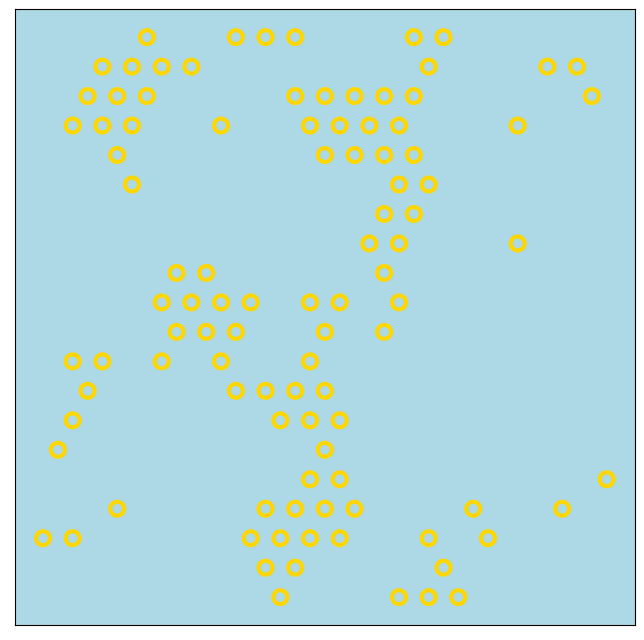

In [60]:


istep=0
Nsteps=100
Temperatura=1
P=0
for istep in range(Nsteps):
    if(istep%100==0):
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(1, 1, 1) 
        ax.set_facecolor('lightblue')
        #plt.scatter(xlattice,ylattice,marker=".",color="skyblue",alpha=1.0)
        plt.scatter(xlattice[occupancies==1],ylattice[occupancies==1],c="None",s=100,marker="o",edgecolor="gold",linewidth=3)
        plt.xticks([])
        plt.yticks([])
    irand = np.random.randint(NMP)
    ixrand=np.random.randint(L)
    iyrand=np.random.randint(L)
    while(occupancies[ixrand,iyrand]==1):
        ixrand=np.random.randint(L)
        iyrand=np.random.randint(L)
    xy_vic=[ixrand,iyrand]
    e_old=0.0
    for j in range(6):
        xy_tmp = [ixvic[particles[irand,0],particles[irand,1],j],iyvic[particles[irand,0],particles[irand,1],j]]
        if(occupancies[xy_tmp[0],xy_tmp[1]]==1): e_old-=1.0
    e_new=0.0
    for j in range(6):
        xy_tmp = [ixvic[xy_vic[0],xy_vic[1],j],iyvic[xy_vic[0],xy_vic[1],j]]
        if(np.array(xy_tmp== particles[irand,:]).all ):continue #it would be empty
        if(occupancies[xy_tmp]==1): e_new-=1.0
    P = np.exp( -(e_new-e_old)/(Temperatura) )
    R = np.random.rand()
    if(R<P):
        occupancies[xy_vic[0],xy_vic[1]]=1
        occupancies[particles[irand,0],particles[irand,1]]=0
        particles[irand,0] = xy_vic[0]
        particles[irand,1] = xy_vic[1]
        
    